Aluno: Felipe Miranda Cardoso de Sá
<br>Matrícula: 201802677
<br> PDI - Processamento Digital de Imagens
<br> Professor: Cassio Denner

Questão1) Filtragem no Domínio da Frequência – Com as imagens do livro texto
usadas para ilustrar filtros no domínio da frequência (link para o repositório no
primeiro tópico da turma no G. Classroom), implemente, enumere os passos que
utilizou para implementar os filtros a seguir e responda as perguntas:

a) um filtro passa-baixa Butterworth com diversas frequências de corte (Gonzalez, p. 179; filtrar a
imagem da Figura 4.45a). Explique o que você observa nos resultados?

In [94]:
import cv2
from scipy import signal
import scipy.fftpack as fp
import numpy as np
import matplotlib.pyplot as plt
import pylab
from cv2 import imread
from google.colab import drive
drive.mount('/content/drive/')
from scipy import fftpack

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
keth = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/new_keth.jpeg", cv2.IMREAD_GRAYSCALE)
lena = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/lena.png", cv2.IMREAD_GRAYSCALE)
img445a = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/Fig0441(a)(characters_test_pattern).tif", cv2.IMREAD_GRAYSCALE)

In [4]:
raio = 45

def mascara(img, fshift):
    rows, cols = img.shape
    crow,ccol = rows/2 , cols/2

    n = len(fshift)
    y,x = np.ogrid[-crow:n-crow, -ccol:n-ccol]
    mask = x*x + y*y <= raio*raio
    return mask

def transf_inversa(masked_img):
    f_ishift = np.fft.ifftshift(masked_img)
    filtered_img = np.fft.ifft2(f_ishift)
    filtered_img = np.abs(filtered_img)
    return filtered_img

In [7]:
f = np.fft.fft2(keth)
fshift = np.fft.fftshift(f)
mask = mascara(keth, fshift)
masked_keth = fshift * mask
filtered_keth = transf_inversa(masked_keth)
filtro_ideal = 100*np.log(1 + np.abs(masked_keth))

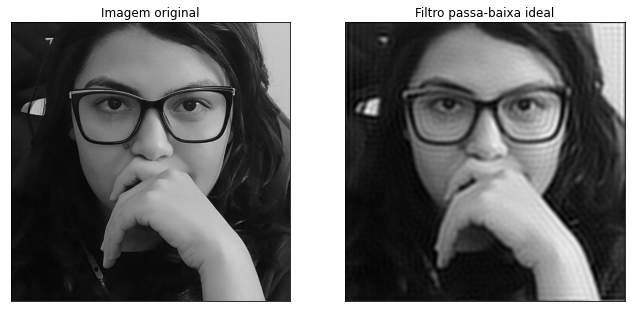

In [8]:
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(keth, cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filtered_keth, cmap = 'gray')
plt.title('Filtro passa-baixa ideal'), plt.xticks([]), plt.yticks([])
plt.show()

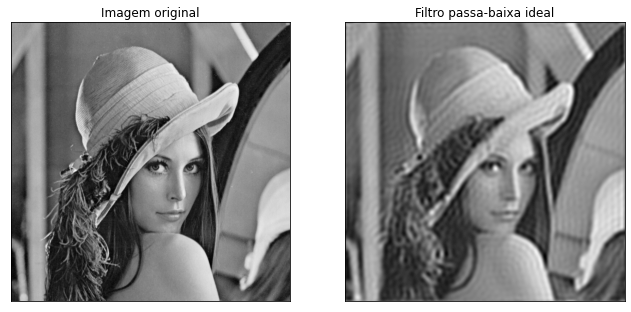

In [9]:
f = np.fft.fft2(lena)
fshift = np.fft.fftshift(f)
mask = mascara(lena, fshift)
masked_lena = fshift * mask
filtered_lena = transf_inversa(masked_lena)
filtro_ideal = 100*np.log(1 + np.abs(masked_lena))
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(lena, cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filtered_lena, cmap = 'gray')
plt.title('Filtro passa-baixa ideal'), plt.xticks([]), plt.yticks([])
plt.show()

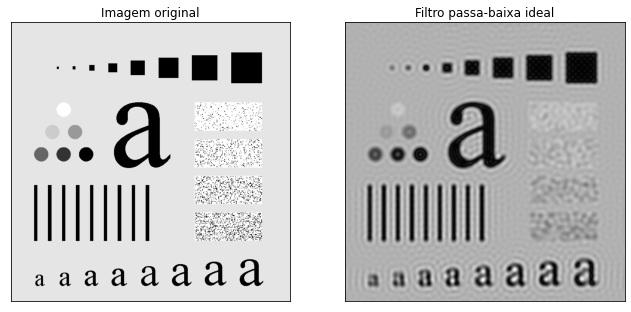

In [11]:
f = np.fft.fft2(img445a)
fshift = np.fft.fftshift(f)
mask = mascara(img445a, fshift)
masked_img445a = fshift * mask
filtered_img445a = transf_inversa(masked_img445a)
filtro_ideal = 100*np.log(1 + np.abs(masked_img445a))
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img445a, cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filtered_img445a, cmap = 'gray')
plt.title('Filtro passa-baixa ideal'), plt.xticks([]), plt.yticks([])
plt.show()

b) um filtro passa-baixa gaussiano com diversas frequências de corte (Gonzalez, Exemplo 4.18, imagem
da Figura 4.48a). O que você observa nos resultados? Explique a equação desse filtro e a obtenção de
H(u,v) na Tabela 4.4;

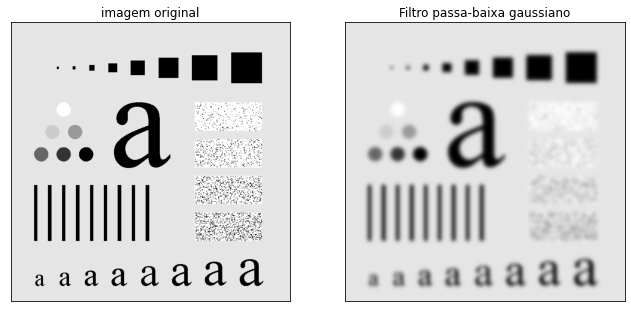

In [19]:
img445ag_old = img445a.copy()
gauss_kernel = np.outer(signal.gaussian(img445a.shape[0], 5),
signal.gaussian(img445a.shape[1], 5))
freq = fp.fft2(img445a)
assert(freq.shape == gauss_kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
convolved = freq*freq_kernel 
img445a1 = fp.ifft2(convolved).real
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img445ag_old, cmap = 'gray')
plt.title('imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img445a1, cmap = 'gray')
plt.title('Filtro passa-baixa gaussiano'), plt.xticks([]), plt.yticks([])
plt.show()

c) um filtro passa-alta ideal com diversos raios (Gonzalez, Figura 4.52a, p. 185; filtrar a imagem da
Figura 4.41a). O que você observa nos resultados?

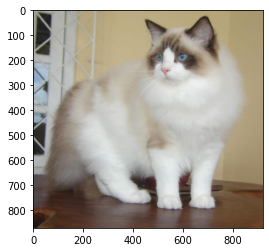

In [53]:
img = plt.imread("/content/drive/MyDrive/HistogramasPDI/imagens/Ragdoll.jpg")/float(2**8)
plt.imshow(img)
plt.show()

In [54]:
def circle(shape,diameter):
    if len(shape) == 2:
        tf = np.zeros(shape,dtype=bool)
        center = np.array(tf.shape)/2.0

        for iy in range(shape[0]):
            for ix in range(shape[1]):
                tf[iy,ix] = (iy- center[0])**2 + (ix - center[1])**2 < diameter **2
    return(tf)

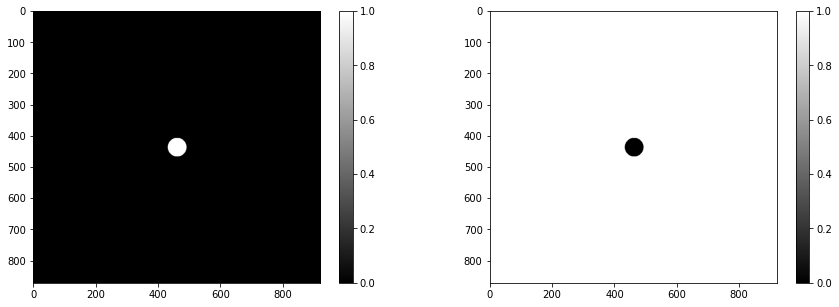

In [70]:
tfcircleIN   = circle(shape=img.shape[:2],diameter=30)
tfcircleOUT  = ~tfcircleIN

fig = plt.figure(figsize=(15,5))
ax  = fig.add_subplot(1,2,1)
im  = ax.imshow(tfcircleIN,cmap="gray")
plt.colorbar(im)
ax  = fig.add_subplot(1,2,2)
im  = ax.imshow(tfcircleOUT,cmap="gray")
plt.colorbar(im)
plt.show()

In [71]:
fft_img = np.zeros_like(img,dtype=complex)
for ichannel in range(fft_img.shape[2]):
    fft_img[:,:,ichannel] = np.fft.fftshift(np.fft.fft2(img[:,:,ichannel]))

In [72]:
def filter_circle(TFcircleOUT,fft_img_channel):
    temp = np.zeros(fft_img_channel.shape[:2],dtype=complex)
    temp[TFcircleOUT] = fft_img_channel[TFcircleOUT]
    return(temp)

fft_img_filtered_OUT = []

for ichannel in range(fft_img.shape[2]):
    fft_img_channel  = fft_img[:,:,ichannel]
    temp = filter_circle(tfcircleOUT,fft_img_channel)
    fft_img_filtered_OUT.append(temp) 
    
fft_img_filtered_OUT = np.array(fft_img_filtered_OUT)
fft_img_filtered_OUT = np.transpose(fft_img_filtered_OUT,(1,2,0))

In [73]:
abs_fft_img = np.abs(fft_img)
abs_fft_img_filtered_OUT = np.abs(fft_img_filtered_OUT)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


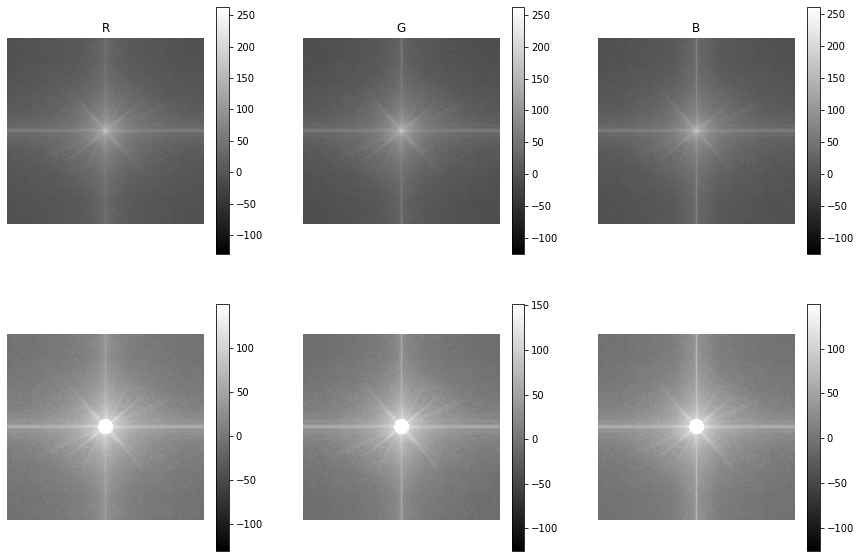

In [74]:
def plot_fft(absfft):
    magnitude_spectrum = 20*np.log(absfft)
    return(ax.imshow(magnitude_spectrum,cmap="gray"))

fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
fontsize = 15 
for ichannel, color in enumerate(["R","G","B"]):
    ax = axs[0,ichannel]
    ax.set_title(color)
    im = plot_fft(abs_fft_img[:,:,ichannel])
    ax.axis("off")
    if ichannel == 0:
        ax.set_ylabel("DFT original",fontsize=fontsize)
    fig.colorbar(im,ax=ax)
    
    ax = axs[1,ichannel]
    im = plot_fft(abs_fft_img_filtered_OUT[:,:,ichannel])
    ax.axis("off")
    if ichannel == 0:
        ax.set_ylabel("DFT + Filtro passa-alta",fontsize=fontsize)   
    fig.colorbar(im,ax=ax)
    
plt.show()

In [75]:
def inv_FFT_all_channel(fft_img):
    img_reco = []
    for ichannel in range(fft_img.shape[2]):
        img_reco.append(np.fft.ifft2(np.fft.ifftshift(fft_img[:,:,ichannel])))
    img_reco = np.array(img_reco)
    img_reco = np.transpose(img_reco,(1,2,0))
    return(img_reco)

img_reco = inv_FFT_all_channel(fft_img)
img_reco_filtered_OUT = inv_FFT_all_channel(fft_img_filtered_OUT)

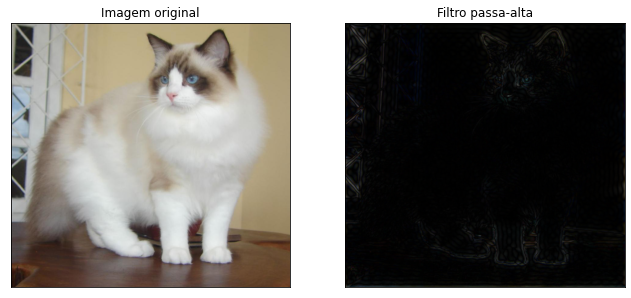

In [76]:
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(np.abs(img_reco), cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(np.abs(img_reco_filtered_OUT), cmap = 'gray')
plt.title('Filtro passa-alta'), plt.xticks([]), plt.yticks([])
plt.show()

d) um filtro de chanfro (notch) para eliminação de padrões de impressão (jornais, fotografias antigas,
etc). Use a imagem da Figura 4.64a;

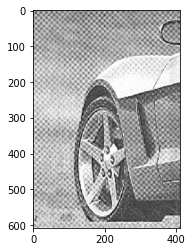

In [91]:
im = plt.imread("/content/drive/MyDrive/HistogramasPDI/imagens/car.jpg")/float(2**8)
plt.imshow(im)
plt.show()

In [92]:
img_old = im.copy()
x = np.linspace(-10, 10, 15)
kernel_1d = np.exp(-0.005*x**2)
kernel_1d /= np.trapz(kernel_1d) # normaliza a soma
gauss_kernel1 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
kernel_1d = np.exp(-5*x**2)
kernel_1d /= np.trapz(kernel_1d) # normaliza a soma
gauss_kernel2 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
DoGKernel = gauss_kernel1[:, :, np.newaxis] - gauss_kernel2[:, :,
np.newaxis]
im = signal.fftconvolve(im, DoGKernel, mode='same')

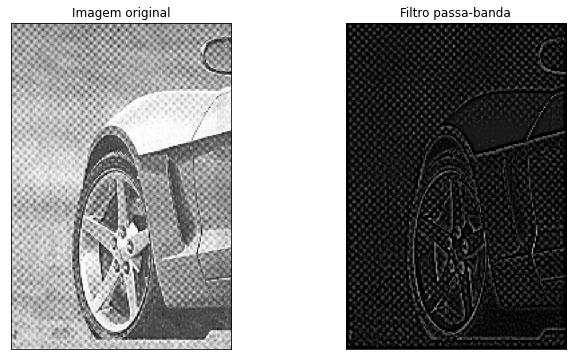

In [93]:
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img_old, cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im, cmap = 'gray')
plt.title('Filtro passa-banda'), plt.xticks([]), plt.yticks([])
plt.show()

e) um filtro rejeita-banda para a imagem do Gonzalez/Figura 5.16 (remoção de ruído periódico). Você
conseguiu obter o mesmo resultado? Você conseguiria melhorá-lo? Mostre.

In [95]:
pylab.figure(figsize=(15,10))
im = np.mean(imread("/content/drive/MyDrive/HistogramasPDI/imagens/Fig0505(a)(applo17_boulder_noisy).tif"), axis=2) / 255
img_old = im.copy()
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift( F1 )
for n in range(im.shape[1]): 
    im[:, n] += np.cos(0.1*np.pi*n)
F1 = fftpack.fft2((im).astype(float)) 
F2 = fftpack.fftshift( F1 )

<Figure size 1080x720 with 0 Axes>

In [96]:
F2[170:176,:220] = F2[170:176,230:] = 0
im1 = fftpack.ifft2(fftpack.ifftshift( F2 )).real

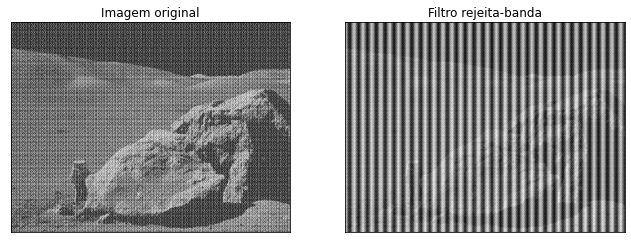

In [97]:
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img_old, cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im1, cmap = 'gray')
plt.title('Filtro rejeita-banda'), plt.xticks([]), plt.yticks([])
plt.show()